# Preprocessing Dataset

As the dataset is small, so we can load it entirely from hard drive to memory for faster processing. We do not need any dataset loader for this problem.

In [1]:
# import important packages

import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

# set path to the dataset
IMAGES_PATH = "dataset/faces"

In [2]:
images_dict = dict()
for user_id in os.listdir(IMAGES_PATH):
    user_id_path = os.path.join(IMAGES_PATH, user_id)
    for image_name in os.listdir(user_id_path):
        _, extension = os.path.splitext(image_name)
        if extension != ".txt":
            images_dict[image_name] = os.path.join(os.path.join(user_id_path, image_name))

print(f"Total images found: {len(images_dict)}")

Total images found: 19370


In [3]:
df_1 = pd.read_csv("dataset/fold_0_data.txt", delimiter="\t")
df_2 = pd.read_csv("dataset/fold_1_data.txt", delimiter="\t")
df_3 = pd.read_csv("dataset/fold_2_data.txt", delimiter="\t")
df_4 = pd.read_csv("dataset/fold_3_data.txt", delimiter="\t")
df_5 = pd.read_csv("dataset/fold_4_data.txt", delimiter="\t")

df = pd.concat([df_1, df_2, df_3, df_4, df_5], axis=0)
df["image_name"] = "coarse_tilt_aligned_face." + df["face_id"].astype(str) + "." + df["original_image"].astype(str)

print(f"Total images found: {len(df)}")
df.head()

Total images found: 19370


,user_id,original_image,face_id,age,gender,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score,image_name
0,30601258@N03,10399646885_67c7d20df9_o.jpg,1,"(25, 32)",f,0,414,1086,1383,-115,30,17,coarse_tilt_aligned_face.1.10399646885_67c7d20...
1,30601258@N03,10424815813_e94629b1ec_o.jpg,2,"(25, 32)",m,301,105,640,641,0,0,94,coarse_tilt_aligned_face.2.10424815813_e94629b...
2,30601258@N03,10437979845_5985be4b26_o.jpg,1,"(25, 32)",f,2395,876,771,771,175,-30,74,coarse_tilt_aligned_face.1.10437979845_5985be4...
3,30601258@N03,10437979845_5985be4b26_o.jpg,3,"(25, 32)",m,752,1255,484,485,180,0,47,coarse_tilt_aligned_face.3.10437979845_5985be4...
4,30601258@N03,11816644924_075c3d8d59_o.jpg,2,"(25, 32)",m,175,80,769,768,-75,0,34,coarse_tilt_aligned_face.2.11816644924_075c3d8...


In [4]:
df["age"].unique()

array(['(25, 32)', '(38, 43)', '(4, 6)', '(60, 100)', '(15, 20)',
       '(48, 53)', '(8, 12)', '(0, 2)', 'None', '(38, 48)', '35', '3',
       '55', '58', '22', '13', '45', '36', '23', '(38, 42)', '(8, 23)',
       '(27, 32)', '57', '56', '2', '29', '34', '42', '46', '32'],
      dtype=object)

In [5]:
# drop records with age value None
df = df.loc[df["age"] != "None"].reset_index(drop=True)
df

,user_id,original_image,face_id,age,gender,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score,image_name
0,30601258@N03,10399646885_67c7d20df9_o.jpg,1,"(25, 32)",f,0,414,1086,1383,-115,30,17,coarse_tilt_aligned_face.1.10399646885_67c7d20...
1,30601258@N03,10424815813_e94629b1ec_o.jpg,2,"(25, 32)",m,301,105,640,641,0,0,94,coarse_tilt_aligned_face.2.10424815813_e94629b...
2,30601258@N03,10437979845_5985be4b26_o.jpg,1,"(25, 32)",f,2395,876,771,771,175,-30,74,coarse_tilt_aligned_face.1.10437979845_5985be4...
3,30601258@N03,10437979845_5985be4b26_o.jpg,3,"(25, 32)",m,752,1255,484,485,180,0,47,coarse_tilt_aligned_face.3.10437979845_5985be4...
4,30601258@N03,11816644924_075c3d8d59_o.jpg,2,"(25, 32)",m,175,80,769,768,-75,0,34,coarse_tilt_aligned_face.2.11816644924_075c3d8...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18617,101515718@N03,10587826073_6663f5b654_o.jpg,2280,"(25, 32)",f,718,748,492,492,0,0,63,coarse_tilt_aligned_face.2280.10587826073_6663...
18618,101515718@N03,10587571495_a61785cd06_o.jpg,2278,"(25, 32)",m,48,472,768,768,-15,0,25,coarse_tilt_aligned_face.2278.10587571495_a617...
18619,101515718@N03,10587571495_a61785cd06_o.jpg,2279,"(25, 32)",f,950,0,692,687,-5,0,27,coarse_tilt_aligned_face.2279.10587571495_a617...
18620,50458575@N08,9426695459_9e8b347604_o.jpg,2281,"(25, 32)",f,831,895,899,899,0,15,59,coarse_tilt_aligned_face.2281.9426695459_9e8b3...


### Mapping Age to Age Brackets

In [6]:
label_mapping_dict = {
    0: (0, 3),
    1: (4, 6),
    2: (8, 13),
    3: (15, 20),
    4: (25, 32),
    5: (35, 43),
    6: (45, 53),
    7: (60, 150)
}


df["age_new"] = "-"
for index, row in df.iterrows():
    
    age_ = str(row['age'])
    try:
        age_ = int(age_)
        for cls_index, age_b in label_mapping_dict.items():
            if age_ >= age_b[0] and age_ <= age_b[1]:
                df.at[index, "age_new"] = cls_index
    except:
        age_ = tuple([int(a.strip().replace(")", "").replace("(", "")) for a in age_.split(",")])
        for cls_index, age_b in label_mapping_dict.items():
            if age_[0] >= age_b[0] and age_[1] <= age_b[1]:
                df.at[index, "age_new"] = cls_index

df_processed = df.loc[df["age_new"] != "-"]
df_processed["age_new"].value_counts()

4    5095
5    2689
0    2509
2    2292
1    2140
3    1642
6     919
7     872
Name: age_new, dtype: int64

# Loading Dataset in Memory

As the dataset is small, so we can load it entirely from hard drive to memory for faster processing. We do not need any dataset loader for this problem.

In [7]:
# Loading Dataset
def cropPhoto(image, pnt, box, size=0.1):
    [x1, y1, x2, y2] = box
    box_w, box_h = (x2 - x1), (y2 - y1)
    img_h, img_w = image.shape[:2]
    
    x1c = int(max(0, x1 - (box_w * size)))
    y1c = int(max(0, y1 - (box_h * size)))
    x2c = int(min(img_w, x2 + (box_w * size)))
    y2c = int(min(img_h, y2 + (box_h * size)))
    crop = image[y1c:y2c, x1c:x2c]
    return crop

In [12]:
import os
from tqdm import tqdm
from mtcnn_pytorch import MTCNN
from PIL import Image

# If required, create a face detection pipeline using MTCNN:
mtcnn = MTCNN()

# load dataset
DATASET_PATH = "dataset"
INPUT_SHAPE = (196, 196)

# initialize the X and y lists to store images and class labels
X, y_Age, y_Gender = [], [], []

label_mapping_dict_age = {
    0: (0, 3),
    1: (4, 6),
    2: (8, 13),
    3: (15, 20),
    4: (25, 32),
    5: (35, 43),
    6: (45, 53),
    7: (60, 150)
}

label_mapping_dict_gender = {
    0: "female",
    1: "male",
}


MAX_NUMBER_OF_CLASS_INSTANCES = 1000

def maxArea(box):
    return ((box[2] - box[0]) * (box[3] - box[1]))

# class hist is a list containing the frequency of class instances. Used to draw the histogram
class_hist_age = []
class_hist_gender = []
classes_dict_count = dict()

for row_index, row in tqdm(df_processed.iterrows(), total=len(df)):
    
    age = int(row["age_new"])
    gender = 0 if row["gender"] == "f" else 1
    
    if age not in classes_dict_count:
        classes_dict_count[age] = 0
    
    if classes_dict_count[age] >= MAX_NUMBER_OF_CLASS_INSTANCES:
        continue
    else:
        classes_dict_count[age] += 1
        
    class_hist_age.append(age)
    class_hist_gender.append(gender)
    
    # read the image using openCV
    img_path = os.path.join(IMAGES_PATH, row["user_id"], row["image_name"])
    img = Image.open(img_path)
    img_w, img_h = img.size
    
    # Get cropped and prewhitened image tensor
    boxes, probs, points = mtcnn.detect(img, landmarks=True)
    
    # skip if no face is detected
    if boxes is None:
        continue
        
    # if there are multiple faces, pick the one with maximum box area
    box = max(boxes, key=maxArea)
    
    landmarks_ = points[np.where(boxes == box)]
    nose_landmark = (int(landmarks_[2][0]), int(landmarks_[2][1]))
    
    xmin, ymin, xmax, ymax = [int(v) for v in box]
    
    xmin = max(0, xmin)
    ymin = max(0, ymin)
    xmax = min(img_w, xmax)
    ymax = min(img_h, ymax)
    
    img = np.array(img, dtype=np.uint8)
            
    # crop the face
    img = cropPhoto(img, nose_landmark, [xmin, ymin, xmax, ymax], size=0.5)
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Preprocess 1.
    # resize img to a fixed 
    img = cv2.resize(img, INPUT_SHAPE, interpolation=cv2.INTER_AREA)
    
    # append the loaded image and class index to X and y lists
    X.append(img)
    
    # on hot y label
    y_temp = [1 if i == age else 0 for i in range(len(label_mapping_dict_age))]
    y_Age.append(y_temp)
    
    y_temp = [1 if i == gender else 0 for i in range(len(label_mapping_dict_gender))]
    y_Gender.append(y_temp)

# converting lists to numpy array
X = np.array(X, dtype=np.uint8)
y_Gender = np.array(y_Gender, dtype=np.int64)
y_Age = np.array(y_Age, dtype=np.int64)

print("X shape", X.shape)
print("y Gender shape", y_Gender.shape)
print("y Age shape", y_Age.shape)

 98%|██████████████████████████████████████████████████████████████████████████  | 18158/18622 [07:13<00:11, 41.87it/s]


X shape (7779, 196, 196, 3)
y Gender shape (7779, 2)
y Age shape (7779, 8)


### Plot the Loaded Dataset

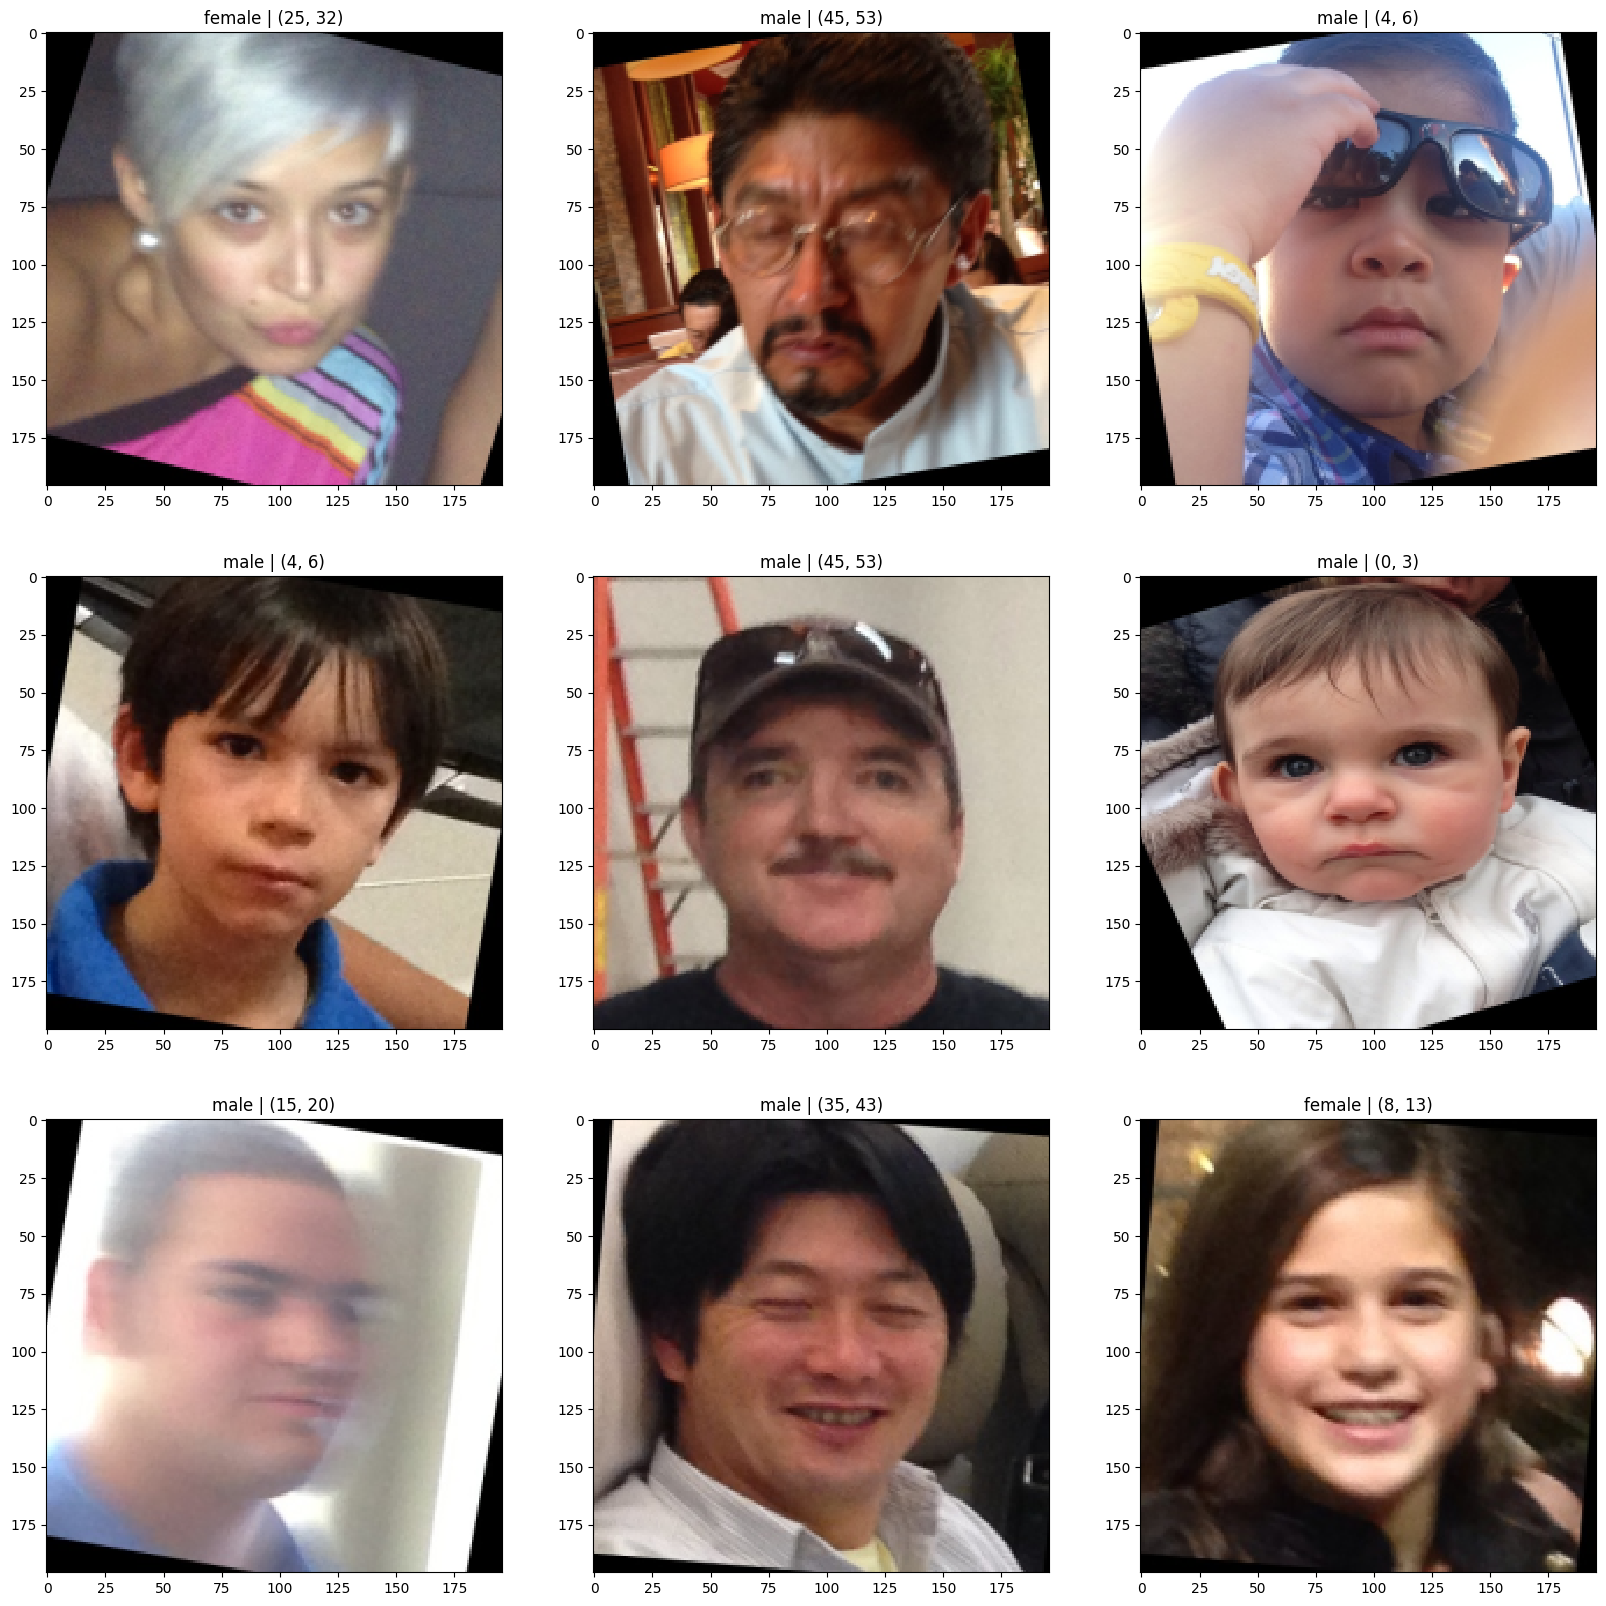

In [14]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
import random
import os

def plotSamples(X, shuffle=False):
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))
    index = 0
    for row in range(3):
        for col in range(3):
            
            if random:
                index = random.randint(0, len(X) - 1)
            else:
                index += 1
                
            image, age, gender = X[index], y_Age[index], y_Gender[index]
            # get the class name
            age_ = label_mapping_dict_age[np.argmax(age)]
            gender_ = label_mapping_dict_gender[np.argmax(gender)]
            
            if len(image.shape) == 2:
                axes[row][col].imshow(image, cmap="gray", interpolation='nearest', aspect='auto')
            else:
                axes[row][col].imshow(image, interpolation='nearest', aspect='auto')

            axes[row][col].set_title(f"{gender_} | {age_}")

    plt.show()
    
plotSamples(X, shuffle=True)

### Plot Class Histrogram

Here we can see that the classes Potato___Early_blight and Potato___Late_blight has both 1000 instances, while the class Potato___healthy has only 152 instances.

We can tackle such class imbalance using different techniques. We will be using data augmentation to bring class balance to the dataset.

<function matplotlib.pyplot.show(close=None, block=None)>

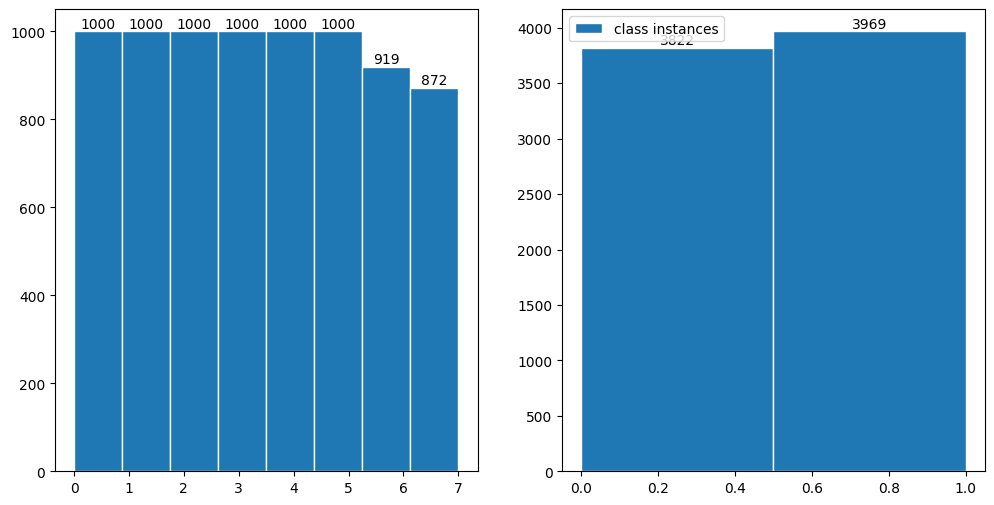

In [15]:
def annotateHist(ax, freq, bins, patches):
    # x coordinate for labels
    bin_centers = np.diff(bins) * 0.5 + bins[:-1]
    n = 0
    for fr, x, patch in zip(freq, bin_centers, patches):
      height = int(freq[n])
      ax.annotate("{}".format(height),
                   xy = (x, height),             # top left corner of the histogram bar
                   xytext = (0,0.2),             # offsetting label position above its bar
                   textcoords = "offset points", # Offset (in points) from the *xy* value
                   ha = 'center', va = 'bottom'
                   )
      n += 1

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

freq, bins, patches = axes[0].hist(class_hist_age, edgecolor='white', label='class instances', bins=len(label_mapping_dict_age))
annotateHist(axes[0], freq, bins, patches)

freq, bins, patches = axes[1].hist(class_hist_gender, edgecolor='white', label='class instances', bins=len(label_mapping_dict_gender))
annotateHist(axes[1], freq, bins, patches)

plt.legend()
plt.show

# Dataset Preprocessing

Image data processing is one of the most under-explored problems in the data science community. Every developer has a unique way of doing it. When building a machine learning/computer vision project, a few problems associated with image data include complexity, inaccuracy, and inadequacy. This is why before building a computer vision model, it is essential that the data is preprocessed (cleaned and processed to the desired format) to achieve the desired results.

## Preprocessing 1: Image Normalization

Also referred to as data re-scaling, it is the process of projecting image data pixels (intensity) to a predefined range e.g [0, 1]. This is commonly used on different data formats, and you want to normalize all of them to apply the same algorithms over them.

Normalization is usually applied to convert an image’s pixel values to a typical or more familiar sense. Its benefits include:

- Fairness across all images - For example, scaling all images to an equal range allows all images to contribute equally to the total loss rather than when other images have high and low pixels ranges give strong and weak loss, respectively.

- Provides a standard learning rate - Since high pixel images require a low learning rate and low pixel images high learning rate, re-scaling helps provide a standard learning rate for all images.

Here, we are normalizing our RGB images which are of data type uint8 and are in the range of [0, 255]. The new range will be [0, 1].

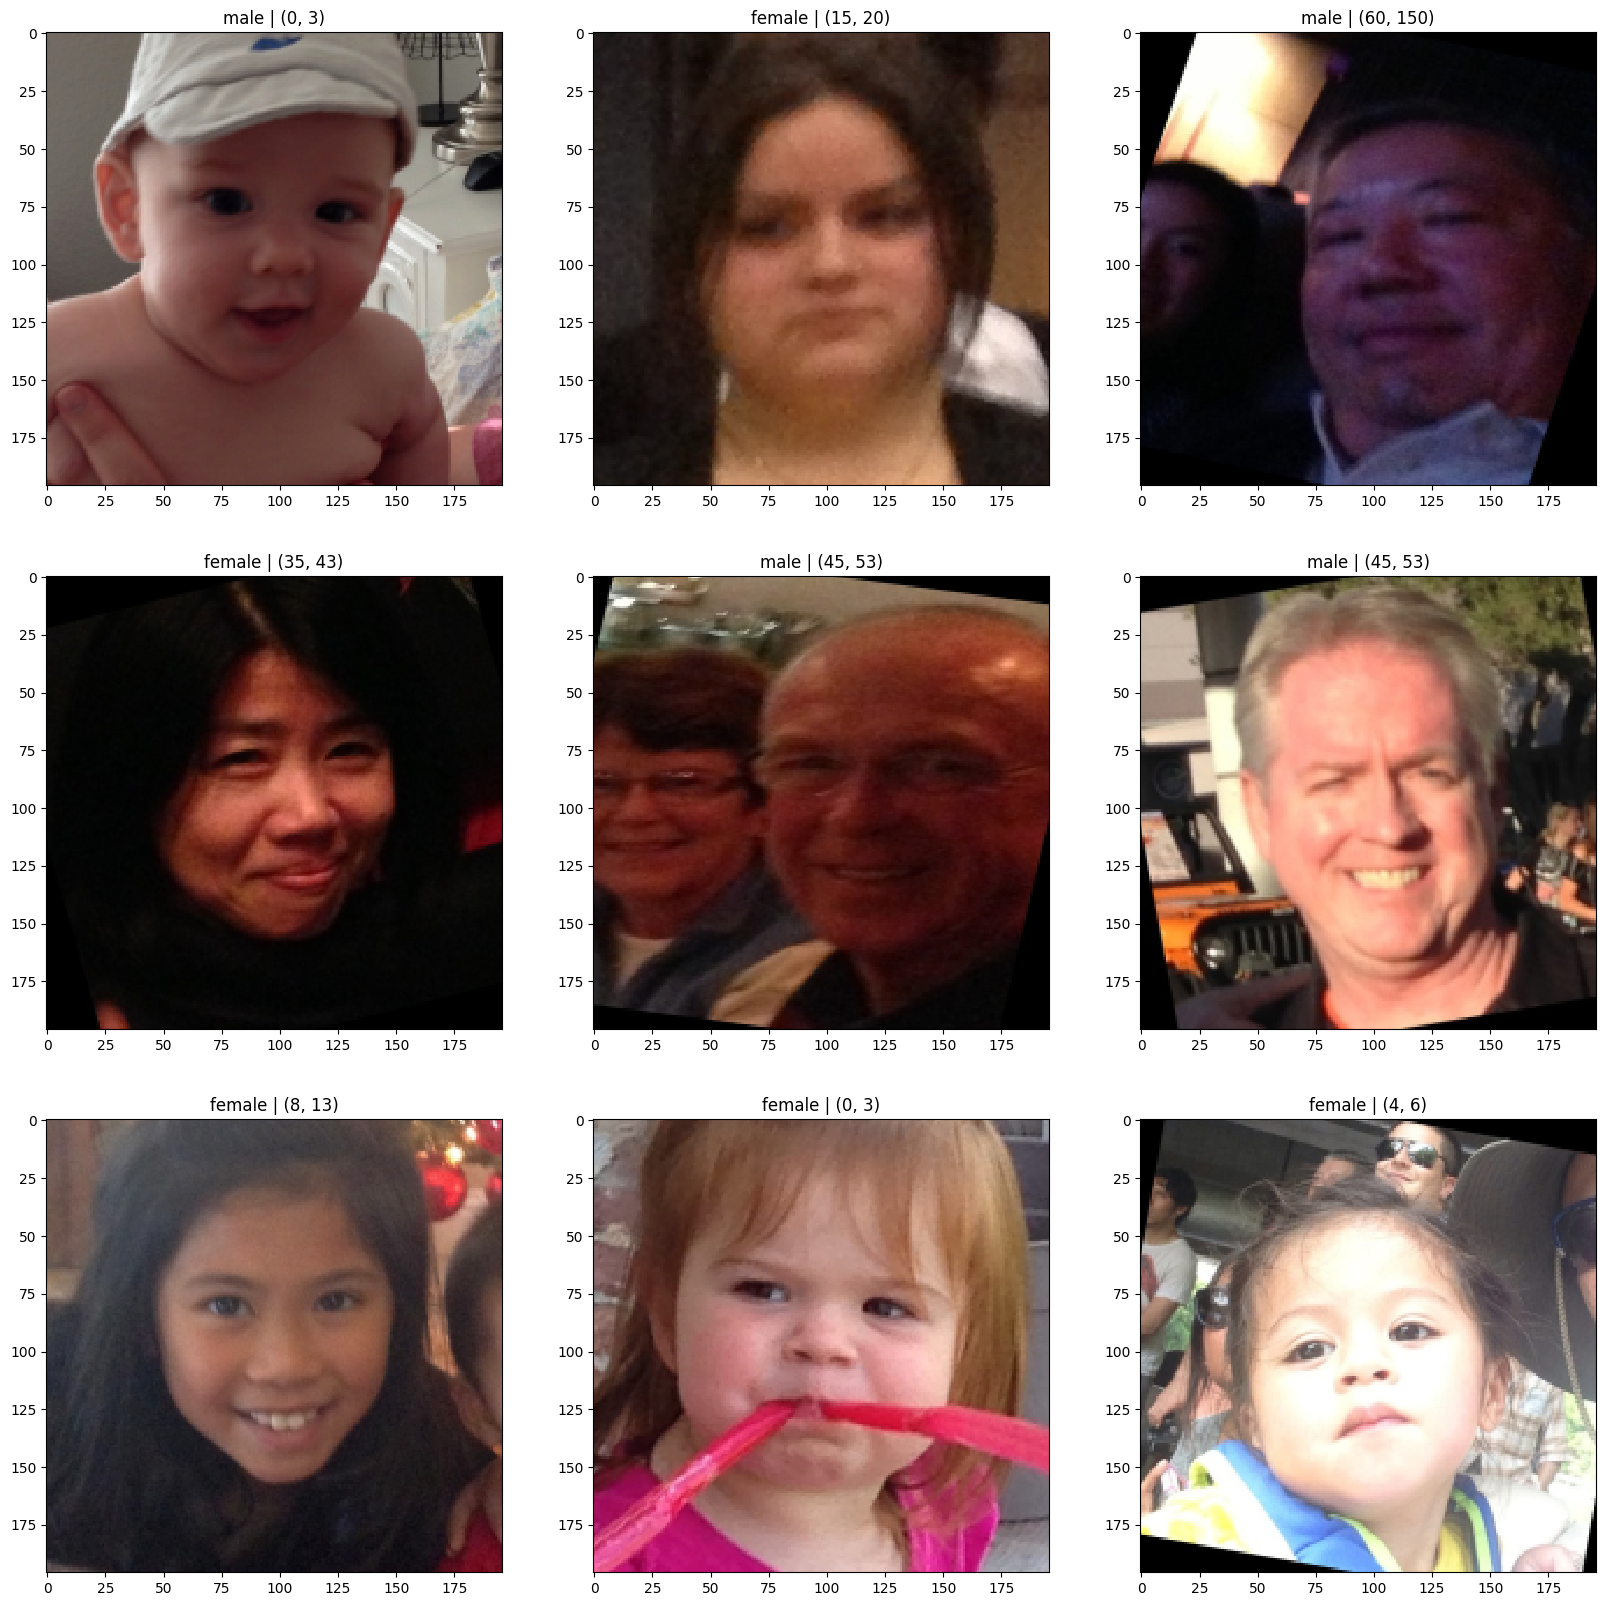

In [16]:
X_normalized = [None for _ in range(len(X))]

for index in range(len(X)):
    img = X[index]
    
    # apply normalization formula here
    # new_range = (x - old_range_minimum) / (old_range_maximum - old_range_minimum)
    norm_image = (img - np.min(img)) / (np.max(img) - np.min(img))
    X_normalized[index] = norm_image

X_normalized = np.array(X_normalized, dtype=np.float32)

# plot samples
plotSamples(X_normalized)

# Splitting the Dataset into Train and Test Sets for Age Prediction

In [19]:
from sklearn.model_selection import train_test_split

TEST_SIZE = 0.2

# split into test train
X_train, X_test, y_train_age, y_test_age, y_train_gender, y_test_gender = train_test_split(
    X_normalized, 
    y_Age,
    y_Gender,
    test_size=TEST_SIZE, 
    random_state=42, 
    shuffle=True
)

print("X_train shape", X_train.shape)
print("y_train_age shape", y_train_age.shape)
print("y_train_gender shape", y_train_gender.shape)

print()
print("X_test shape", X_test.shape)
print("y_test_age shape", y_test_age.shape)
print("y_test_gender shape", y_test_gender.shape)

X_train shape (6223, 196, 196, 3)
y_train_age shape (6223, 8)
y_train_gender shape (6223, 2)

X_test shape (1556, 196, 196, 3)
y_test_age shape (1556, 8)
y_test_gender shape (1556, 2)


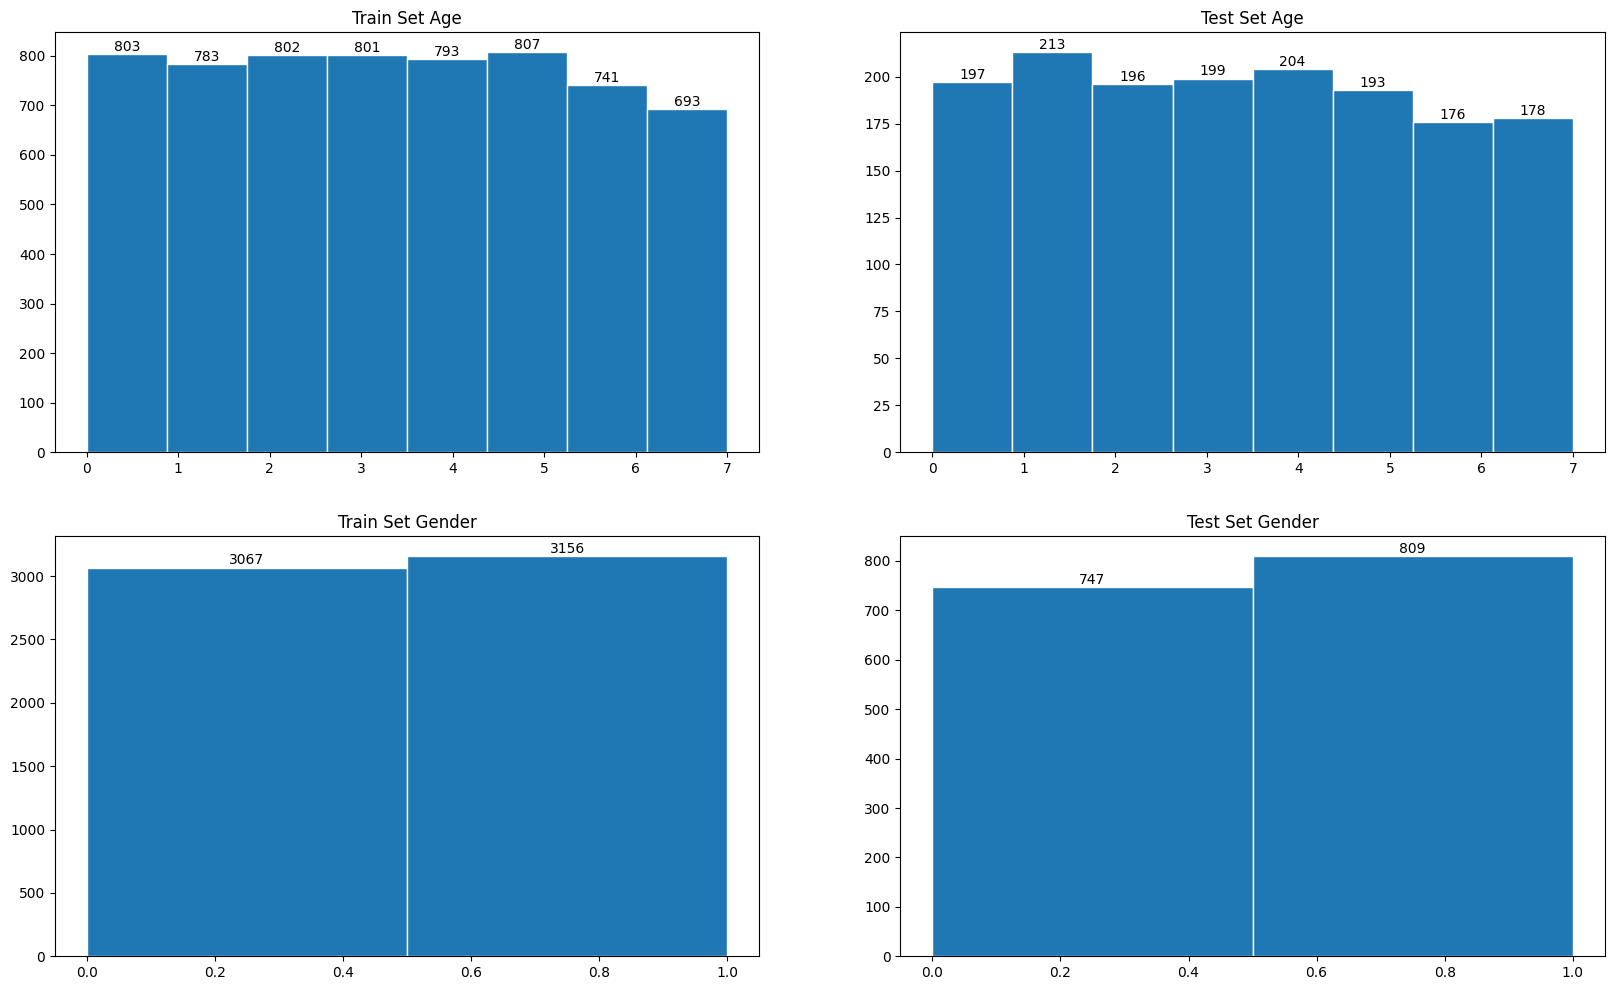

In [20]:
def plotHist(x, ax, num_bins, title=""):
    x = [np.argmax(label) for label in x]
    # plot training set class histogram
    freq, bins, patches = ax.hist(x, edgecolor='white', bins=num_bins)
    ax.set_title("Train Set Age")
    # x coordinate for labels
    bin_centers = np.diff(bins) * 0.5 + bins[:-1]
    n = 0
    for fr, x, patch in zip(freq, bin_centers, patches):
        height = int(freq[n])
        ax.annotate("{}".format(height),
                   xy = (x, height),             # top left corner of the histogram bar
                   xytext = (0,0.2),             # offsetting label position above its bar
                   textcoords = "offset points", # Offset (in points) from the *xy* value
                   ha = 'center', va = 'bottom')
        n += 1
        
    ax.set_title(title)
    
    
# initialize the plot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))

# plot training set class histogram for age
plotHist(y_train_age, axes[0][0], len(label_mapping_dict_age), "Train Set Age")
plotHist(y_test_age, axes[0][1], len(label_mapping_dict_age), "Test Set Age")
plotHist(y_train_gender, axes[1][0], len(label_mapping_dict_gender), "Train Set Gender")
plotHist(y_test_gender, axes[1][1], len(label_mapping_dict_gender), "Test Set Gender")
plt.show()

# Building Custom CNN Model Using Keras

In [23]:
import tensorflow as tf
from keras.models import Model
from tensorflow.keras.layers import (
    Input, Dense, Flatten, Conv1D, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Activation
)



class Net():
    """
    Used to generate our multi-output model. This CNN contains three branches, one for age, other for 
    sex and another for race. Each branch contains a sequence of Convolutional Layers that is defined
    on the make_default_hidden_layers method.
    """

    def backbone(self, inputs):
        """
        Used to generate a default set of hidden layers. The structure used in this network is defined as:

        Conv2D -> BatchNormalization -> Pooling -> Dropout
        """
        x = Conv2D(16, (3, 3), padding="same")(inputs)
        x = Activation("relu")(x)
        x = BatchNormalization(axis=-1)(x)
        
        x = MaxPooling2D(pool_size=(3, 3))(x)
        x = Dropout(0.25)(x)
        
        x = Conv2D(32, (3, 3), padding="same")(x)
        x = Activation("relu")(x)
        x = BatchNormalization(axis=-1)(x)
        
        x = MaxPooling2D(pool_size=(2, 2))(x)
        x = Dropout(0.25)(x)
        
        x = Conv2D(32, (3, 3), padding="same")(x)
        x = Activation("relu")(x)
        x = BatchNormalization(axis=-1)(x)
        
        x = MaxPooling2D(pool_size=(2, 2))(x)
        x = Dropout(0.25)(x)
        return x

    def genderModel(self, inputs, num_classes=2):
        x = self.backbone(inputs)
        x = Flatten()(x)
        
        x = Dense(128)(x)
        x = Activation("relu")(x)
        x = BatchNormalization()(x)
        x = Dropout(0.5)(x)
        
        x = Dense(num_classes)(x)
        x = Activation("sigmoid", name="gender_output")(x)
        return x

    def ageModel(self, inputs, num_classes=8):
        x = self.backbone(inputs)
        x = Flatten()(x)
        
        x = Dense(128)(x)
        x = Activation("relu")(x)
        x = BatchNormalization()(x)
        x = Dropout(0.5)(x)
        
        x = Dense(num_classes)(x)
        x = Activation("sigmoid", name="age_output")(x)
        return x

    def build(self, input_shape, classes_age, classes_gender):
        """
        Used to assemble our multi-output model CNN.
        """
        inputs = Input(shape=input_shape)
        age_model = self.ageModel(inputs, num_classes=classes_age)
        gender_model = self.genderModel(inputs, num_classes=classes_gender)
        model = Model(inputs=inputs,
                      outputs=[age_model, gender_model],
                      name="age_gender_net")
        return model


label_mapping_dict_age = {
    0: (0, 3),
    1: (4, 6),
    2: (8, 13),
    3: (15, 20),
    4: (25, 32),
    5: (35, 43),
    6: (45, 53),
    7: (60, 150)
}

label_mapping_dict_gender = {
    0: "female",
    1: "male",
}

INPUT_SHAPE = (196, 196, 3)
model = Net().build(INPUT_SHAPE, len(label_mapping_dict_age), len(label_mapping_dict_gender))
model.summary()

Model: "age_gender_net"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 196, 196, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_6 (Conv2D)              (None, 196, 196, 16  448         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_9 (Conv2D)              (None, 196, 196, 16  448         ['input_2[0][0]']                
                                )                                                    

                                                                                                  
 dense_6 (Dense)                (None, 128)          1048704     ['flatten_3[0][0]']              
                                                                                                  
 activation_11 (Activation)     (None, 128)          0           ['dense_4[0][0]']                
                                                                                                  
 activation_15 (Activation)     (None, 128)          0           ['dense_6[0][0]']                
                                                                                                  
 batch_normalization_11 (BatchN  (None, 128)         512         ['activation_11[0][0]']          
 ormalization)                                                                                    
                                                                                                  
 batch_nor

In [24]:
from keras.optimizers import Adam

NUM_EPOCHS = 40
init_lr = 1e-4
model.compile(
    optimizer=Adam(lr=init_lr, decay=init_lr/NUM_EPOCHS),
    loss={
        'age_output': 'categorical_crossentropy',
        'gender_output': 'binary_crossentropy'
    },
    metrics={
        'age_output': 'accuracy',
        'gender_output': 'accuracy'
    })

## Start Training the Model

In [26]:
# start training

batch_size = 16
num_epochs = 50
validation_split_ratio = 0.2

history = model.fit(
    X_train,
    {
        'age_output': y_train_age, 
        'gender_output': y_train_gender
    },
    validation_split=validation_split_ratio,
    epochs=num_epochs,
    batch_size=batch_size,
    shuffle= True
)

Epoch 1/50
312/312 [==============================] - 17s 29ms/step - loss: 3.5294 - age_output_loss: 2.7198 - gender_output_loss: 0.8096 - age_output_accuracy: 0.2172 - gender_output_accuracy: 0.6434 - val_loss: 6.4109 - val_age_output_loss: 5.5759 - val_gender_output_loss: 0.8350 - val_age_output_accuracy: 0.1542 - val_gender_output_accuracy: 0.5197
Epoch 2/50
312/312 [==============================] - 7s 23ms/step - loss: 2.9093 - age_output_loss: 2.2523 - gender_output_loss: 0.6571 - age_output_accuracy: 0.2929 - gender_output_accuracy: 0.7133 - val_loss: 7.5110 - val_age_output_loss: 6.4314 - val_gender_output_loss: 1.0796 - val_age_output_accuracy: 0.1839 - val_gender_output_accuracy: 0.5767
Epoch 3/50
312/312 [==============================] - 7s 23ms/step - loss: 2.6156 - age_output_loss: 2.0135 - gender_output_loss: 0.6021 - age_output_accuracy: 0.3278 - gender_output_accuracy: 0.7336 - val_loss: 8.1868 - val_age_output_loss: 7.0521 - val_gender_output_loss: 1.1346 - val_age_o

312/312 [==============================] - 7s 23ms/step - loss: 0.7297 - age_output_loss: 0.5478 - gender_output_loss: 0.1819 - age_output_accuracy: 0.8124 - gender_output_accuracy: 0.9253 - val_loss: 1.9540 - val_age_output_loss: 1.4996 - val_gender_output_loss: 0.4544 - val_age_output_accuracy: 0.5928 - val_gender_output_accuracy: 0.8273
Epoch 48/50
312/312 [==============================] - 7s 23ms/step - loss: 0.7305 - age_output_loss: 0.5493 - gender_output_loss: 0.1813 - age_output_accuracy: 0.8108 - gender_output_accuracy: 0.9273 - val_loss: 1.9630 - val_age_output_loss: 1.4750 - val_gender_output_loss: 0.4880 - val_age_output_accuracy: 0.5831 - val_gender_output_accuracy: 0.8209
Epoch 49/50
312/312 [==============================] - 7s 23ms/step - loss: 0.7006 - age_output_loss: 0.5287 - gender_output_loss: 0.1719 - age_output_accuracy: 0.8186 - gender_output_accuracy: 0.9343 - val_loss: 1.8770 - val_age_output_loss: 1.4048 - val_gender_output_loss: 0.4722 - val_age_output_accu

## Model Plots

### Training Loss vs Validation Loss Plot

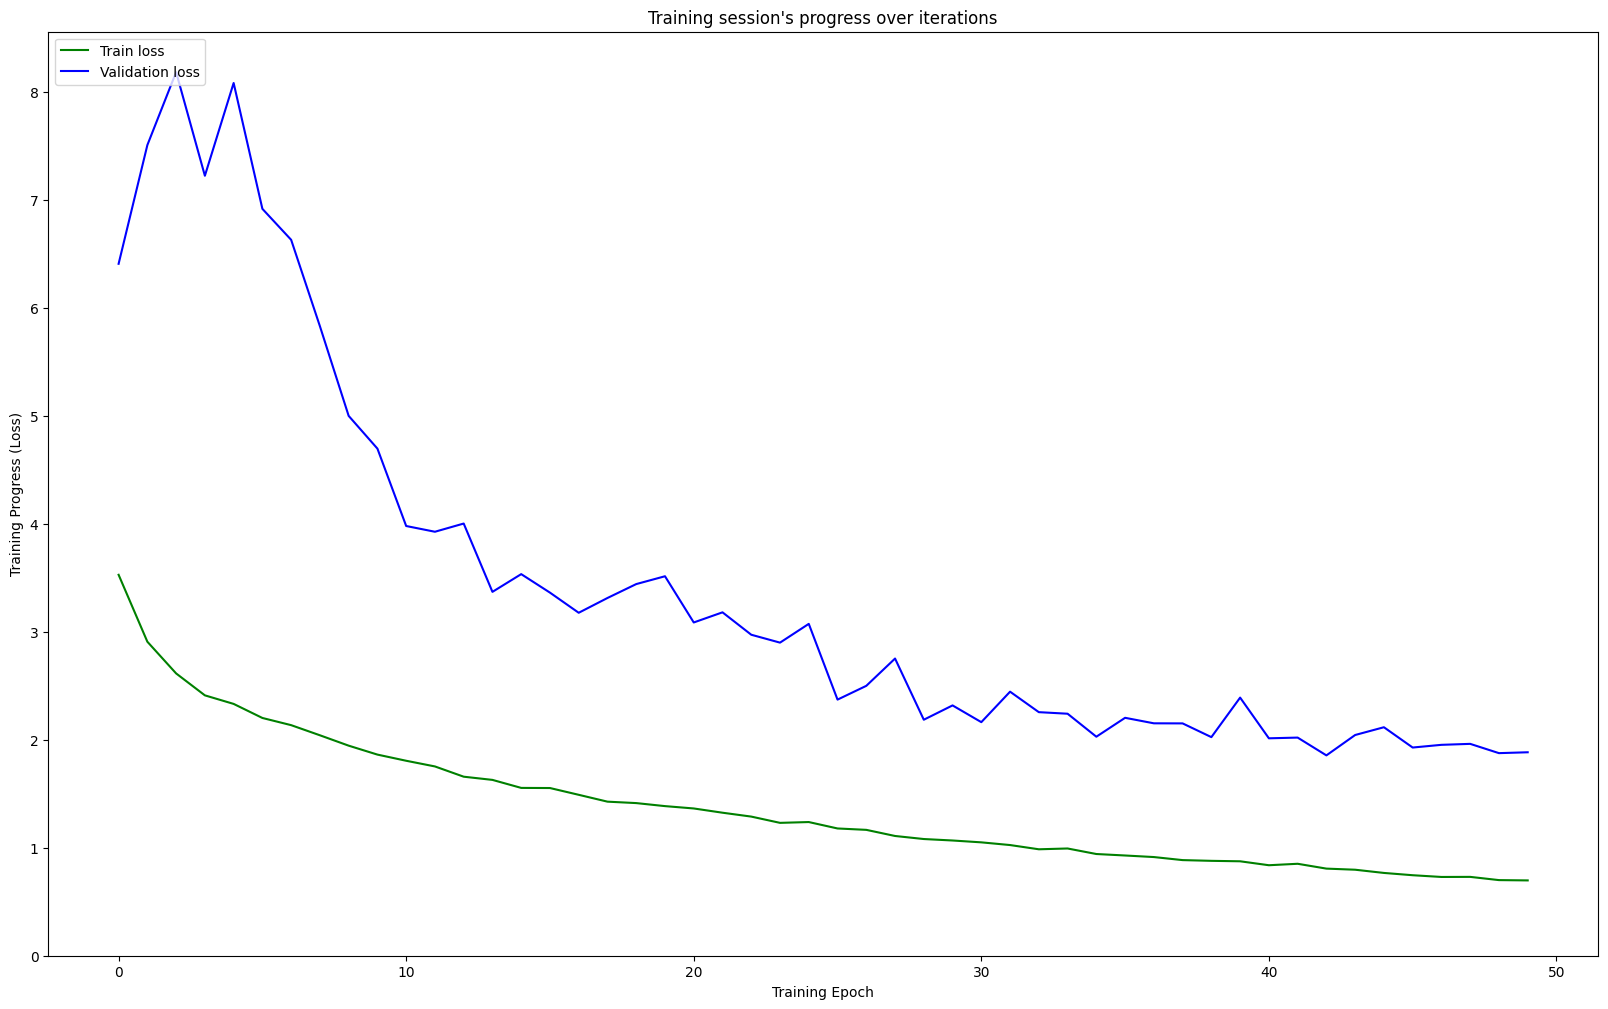

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 12))

plt.plot(np.array(history.history['loss']), "green", label = "Train loss")
plt.plot(np.array(history.history['val_loss']), "blue", label = "Validation loss")
plt.title("Training session's progress over iterations")
plt.legend(loc='upper left')
plt.ylabel('Training Progress (Loss)')
plt.xlabel('Training Epoch')
plt.ylim(0) 

plt.show()

### Training Accuracy Vs Validation Accuracy Plot for Age

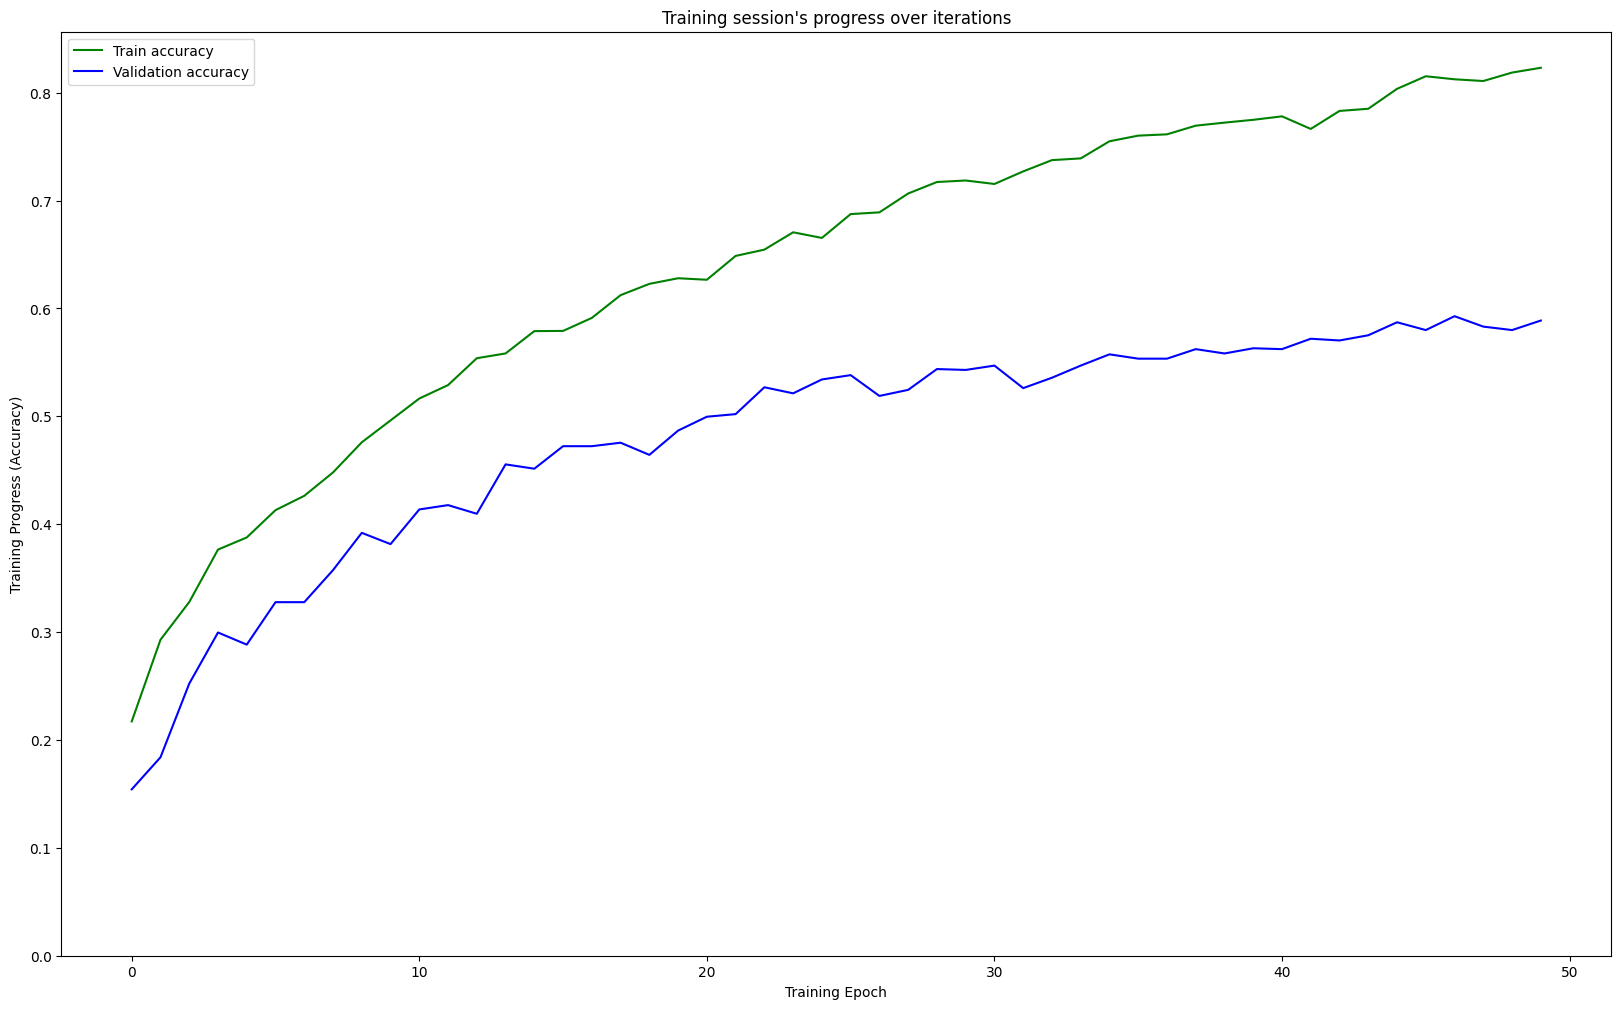

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 12))

plt.plot(np.array(history.history['age_output_accuracy']), "green", label = "Train accuracy")
plt.plot(np.array(history.history['val_age_output_accuracy']), "blue", label = "Validation accuracy")
plt.title("Training session's progress over iterations")
plt.legend(loc='upper left')
plt.ylabel('Training Progress (Accuracy)')
plt.xlabel('Training Epoch')
plt.ylim(0) 
plt.show()

### Training Accuracy Vs Validation Accuracy Plot for Gender

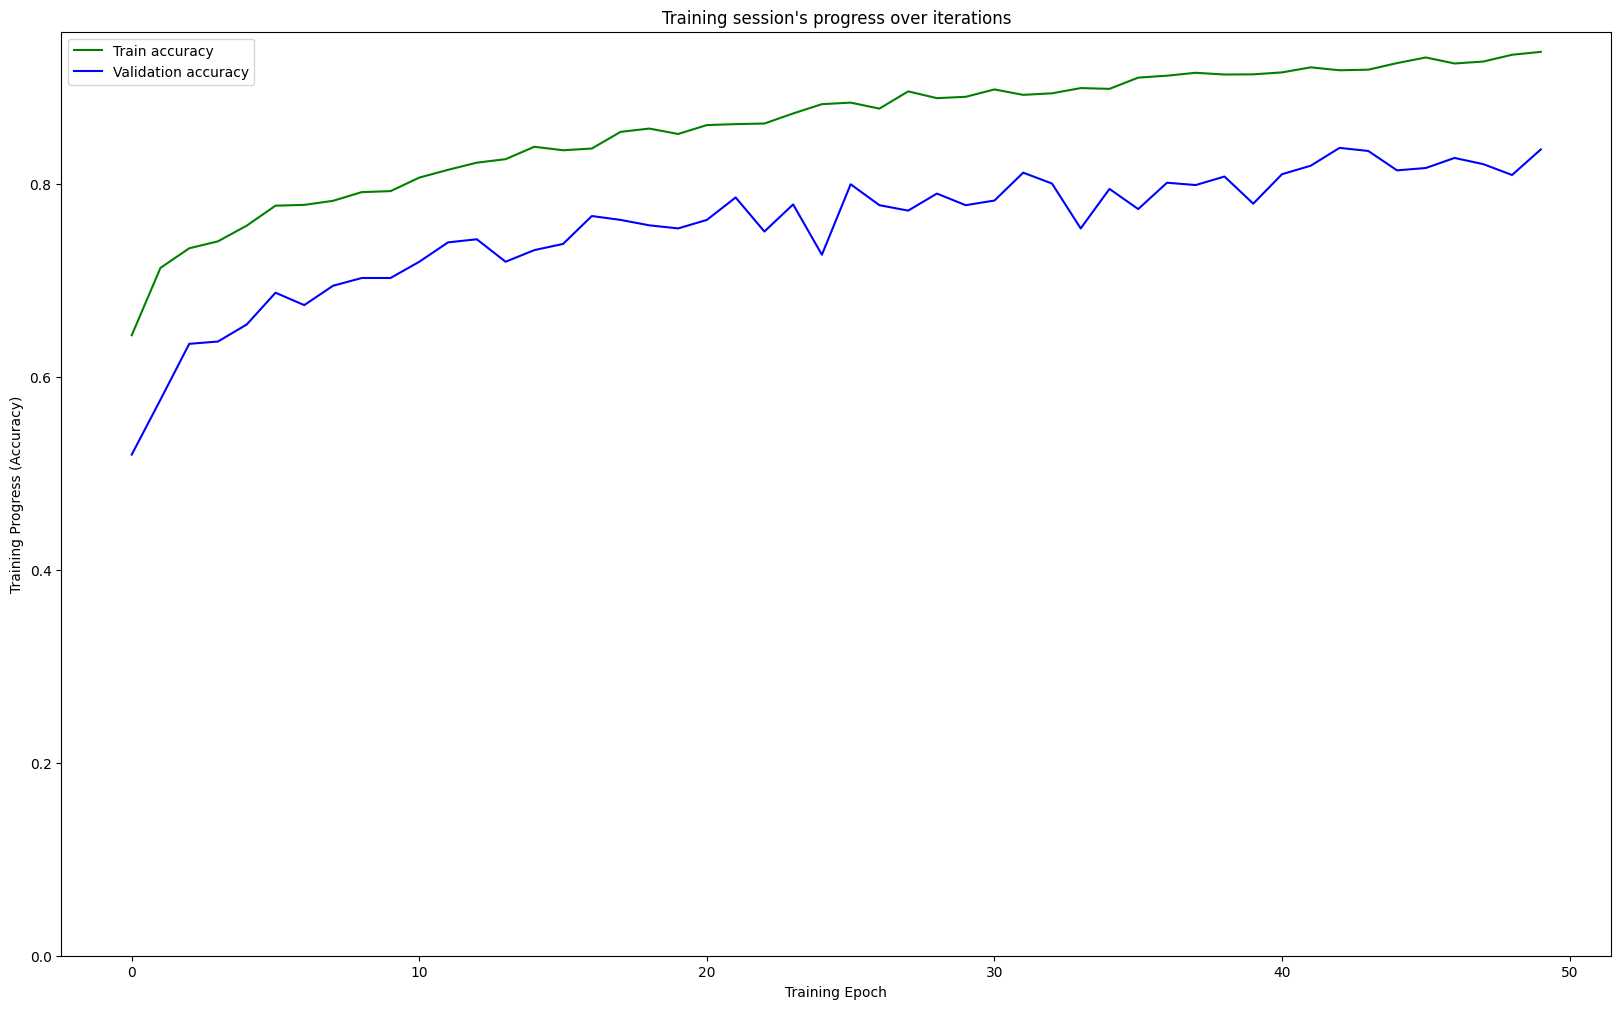

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 12))

plt.plot(np.array(history.history['gender_output_accuracy']), "green", label = "Train accuracy")
plt.plot(np.array(history.history['val_gender_output_accuracy']), "blue", label = "Validation accuracy")
plt.title("Training session's progress over iterations")
plt.legend(loc='upper left')
plt.ylabel('Training Progress (Accuracy)')
plt.xlabel('Training Epoch')
plt.ylim(0) 
plt.show()

## Evaluating Model Performance on the Test Data

In [30]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

batch_size = 32

results = model.evaluate(
    X_test, 
    {
        'age_output': y_test_age, 
        'gender_output': y_test_gender
    },
)

print()
print("loss:", results[0])
print("age_output_accuracy:", results[3])
print("gender_output_accuracy:", results[4])

49/49 [==============================] - 1s 16ms/step - loss: 1.6268 - age_output_loss: 1.2602 - gender_output_loss: 0.3666 - age_output_accuracy: 0.6195 - gender_output_accuracy: 0.8670

loss: 1.626843810081482
age_output_accuracy: 0.6195372939109802
gender_output_accuracy: 0.8669666051864624


### Confusion Matrix

100%|██████████████████████████████████████████████████████████████████████████████| 1556/1556 [01:10<00:00, 22.06it/s]


<AxesSubplot:>

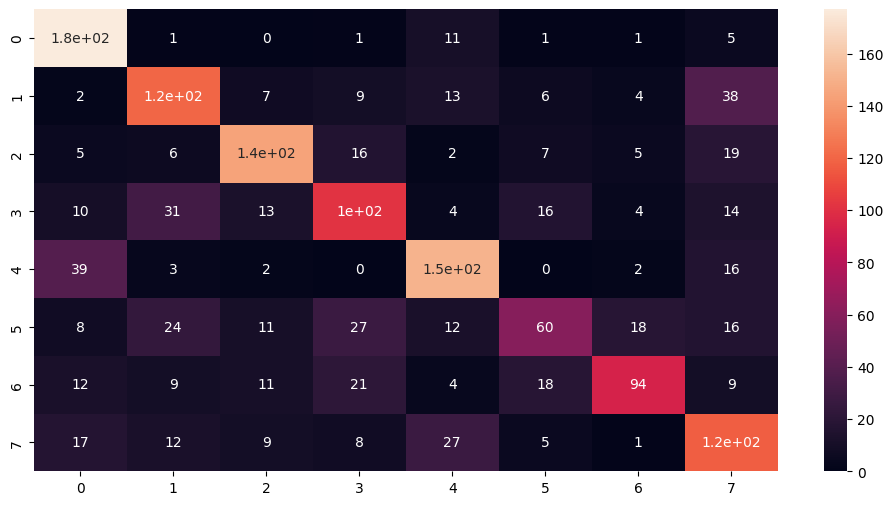

In [31]:
from tqdm import tqdm
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

ground_truth_age = []
ground_truth_gender = []
predicted_ages = []
predicted_genders = []
for image, labels_age, labels_gender in tqdm(zip(X_test, y_test_age, y_test_gender), total=len(X_test)):
    
    gt_age = label_mapping_dict_age[np.argmax(labels_age, axis=0)]
    gt_gender = label_mapping_dict_gender[np.argmax(labels_gender, axis=0)]
    
    images_batch = np.expand_dims(image, axis=0)
    predictions_age, predictions_gender = model.predict(images_batch, verbose=0)

    prediction_age = label_mapping_dict_age[np.argmax(predictions_age, axis=1)[0]]
    prediction_gender = label_mapping_dict_gender[np.argmax(predictions_gender, axis=1)[0]]
    
    # append to global arrays
    ground_truth_age.append(str(gt_age))
    ground_truth_gender.append(gt_gender)
    predicted_ages.append(str(prediction_age))
    predicted_genders.append(prediction_gender)

cf_matrix_age = confusion_matrix(ground_truth_age, predicted_ages)
cf_matrix_gender = confusion_matrix(ground_truth_gender, predicted_genders)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
sns.heatmap(cf_matrix_age, annot=True)

<AxesSubplot:>

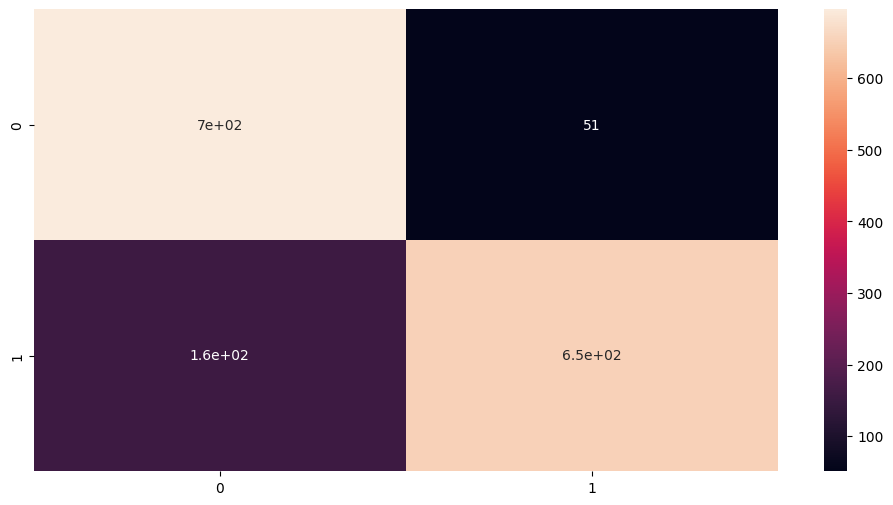

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
sns.heatmap(cf_matrix_gender, annot=True, axes=axes)

## Save and Load Model

Save model - to Drive

In [33]:
import numpy as np
import tensorflow as tf

model_name = 'data/Age_Gender_Prediction__Keras.h5'
model.save(model_name)
model_loaded = tf.keras.models.load_model(model_name)

## Making Predictions using trained model

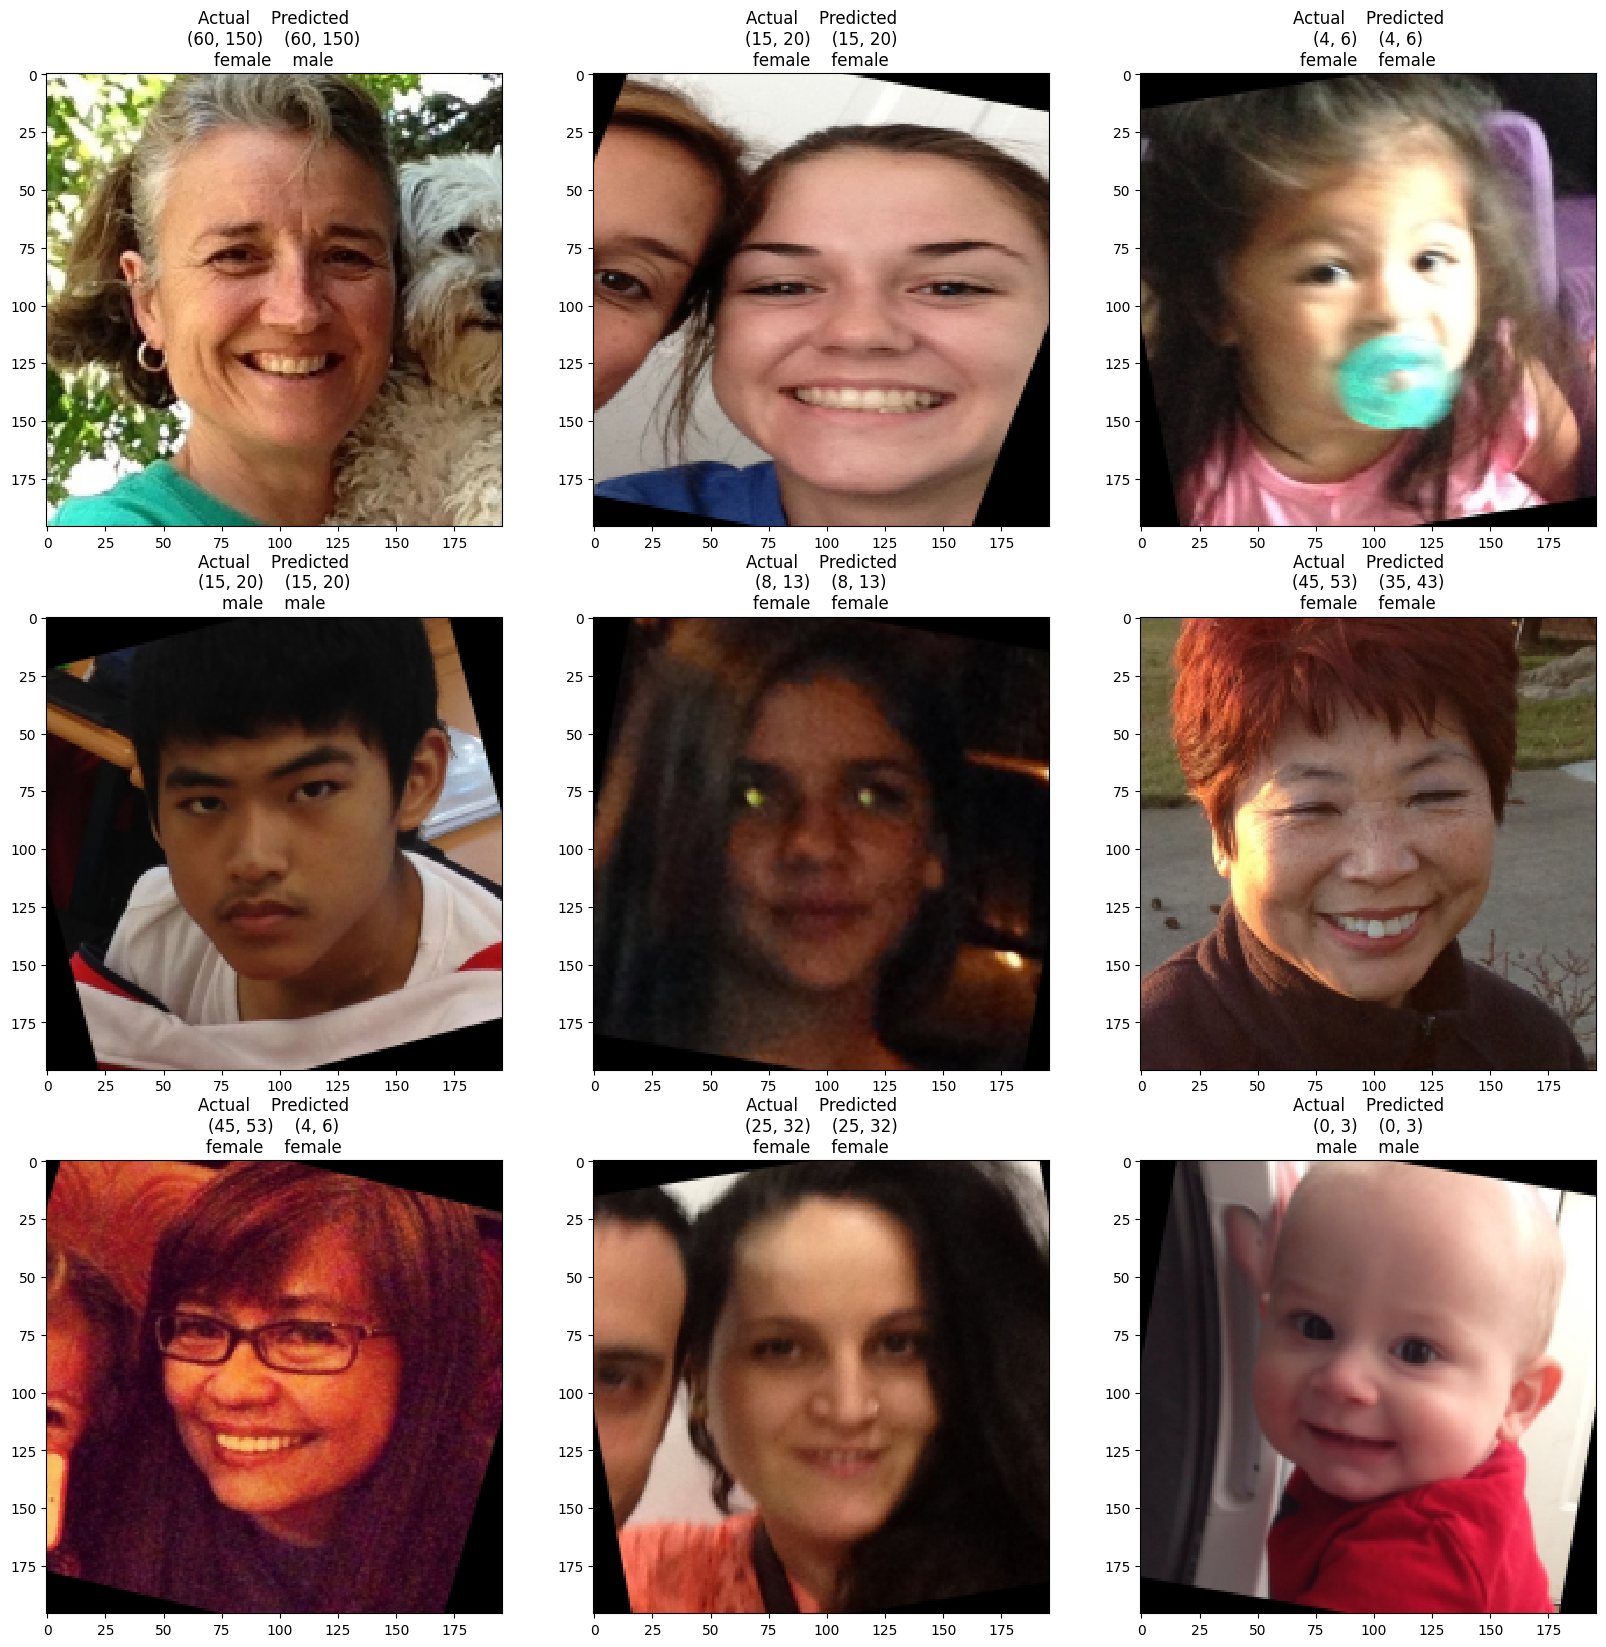

In [34]:
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib import pyplot
import random
import os


fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))

for row in range(3):
    for col in range(3):        
        index = random.randint(0, len(X_test) - 1)
        image, labels_age, labels_gender = X_test[index], y_test_age[index], y_test_gender[index]
        
        gt_age = label_mapping_dict_age[np.argmax(labels_age, axis=0)]
        gt_gender = label_mapping_dict_gender[np.argmax(labels_gender, axis=0)]

        images_batch = np.expand_dims(image, axis=0)
        predictions_age, predictions_gender = model.predict(images_batch, verbose=0)

        prediction_age = label_mapping_dict_age[np.argmax(predictions_age, axis=1)[0]]
        prediction_gender = label_mapping_dict_gender[np.argmax(predictions_gender, axis=1)[0]]
        
        axes[row][col].imshow(image, interpolation='nearest', aspect='auto')        
        label = f"Actual    Predicted\n{gt_age}    {prediction_age}\n{gt_gender}    {prediction_gender}"
        axes[row][col].set_title(label)
        
plt.show()